# Data Analysis of Division of Linguistic Labor Experiment

Data comes from two files: performance.csv and rep-comprension.csv

The former contains a dataframe where each row represents each of the five dogs presented during each round per each player and each stage of the experiment, with the following columns:

1. treatment: single or dyad. 
* dyad: dyad's name.
* player: player's id.
* expert_in: refers to the player's expert-dogs (terriers or hounds), that is, the kinds of dogs on which the player trained during training rounds.
* novice_in: refers to the player's novice-dogs (terriers or hounds).
* stage: experiment's stage (training or game).
* round: round of the respective stage.
* kind: dog's kind.
* classif: refers to the label the player used to classify the dog.
* accuracy: whether classification was correct (0=incorrect/1=correct).
* queried: number of times the player asked partner about dog (NaN if no query was made or if player belongs to treatment==single).
* label: label used by player to query partner (NaN if player didn't query or treatment==single).
* answered: proportion of times query was answered by partner.
* answer_correct: whether partner's answer was correct or not (0=incorrect/1=correct).

The latter contains a dataframe where each row represents the score on label understanding per player and per kind of dog, with the following columns:

1. treatment: single or dyad. 
* dyad: dyad's name.
* player: player's id.
* kind: the dog's kind.
* expertise: whether the player was trained on this kind of dog or not (experts or novices).
* report: player's reported understanding score on this kind of dog.
* accuracy: mean accuracy over game rounds on this kind of dog.
* query: proportion of times the player queried their partner on this kind of dog.
* answered: proportion of times queries on this kind of dog were answered by partner.
* player_responded: proportion of times player responded to queries on this kind of dog.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
data = pd.read_csv('performance.csv')
data.tail()

,treatment,dyad,player,expert_in,novice_in,stage,round,kind,classif,accuracy,queried,answered,answer_correct
20730,dyad,56364-66850,668507302070680,hound,terrier,Game rounds,25,B,B,1,NaN,NaN,NaN
20731,dyad,56364-66850,668507302070680,hound,terrier,Game rounds,25,C,A,0,1.0,1.0,1.0
20732,dyad,56364-66850,668507302070680,hound,terrier,Game rounds,25,B,B,1,NaN,NaN,NaN
20733,dyad,56364-66850,668507302070680,hound,terrier,Game rounds,25,C,C,1,NaN,NaN,NaN
20734,dyad,56364-66850,668507302070680,hound,terrier,Game rounds,25,D,D,1,NaN,NaN,NaN


In [3]:
reporte_comprension = pd.read_csv('rep-comprension.csv')
reporte_comprension.head()

,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded
0,dyad,21409433577947,A,experts,7.0,0.931034,2,0.750000,0.941176
1,dyad,21409433577947,B,novices,7.0,0.828571,22,0.954545,NaN
2,dyad,21409433577947,C,experts,1.0,0.100000,1,1.000000,0.888889
3,dyad,21409433577947,D,novices,7.0,0.571429,14,1.000000,NaN
4,dyad,32111755046981,A,novices,5.0,0.678571,3,0.666667,NaN


----

In [4]:
data_training = data[data['stage']=='Training rounds'][['treatment', 'player', 'round', 'accuracy']]
data_game = data[data['stage']=='Game rounds']
data_game['tipo_ejemplar'] = data_game['kind'].apply(lambda x: 'terrier' if (x=='A' or x=='C') else 'hound')
dfN = data_game[(data_game['novice_in'] == data_game['tipo_ejemplar'])]
dfE = data_game[(data_game['expert_in'] == data_game['tipo_ejemplar'])]


<ipython-input-4-eb1981697635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_game['tipo_ejemplar'] = data_game['kind'].apply(lambda x: 'terrier' if (x=='A' or x=='C') else 'hound')


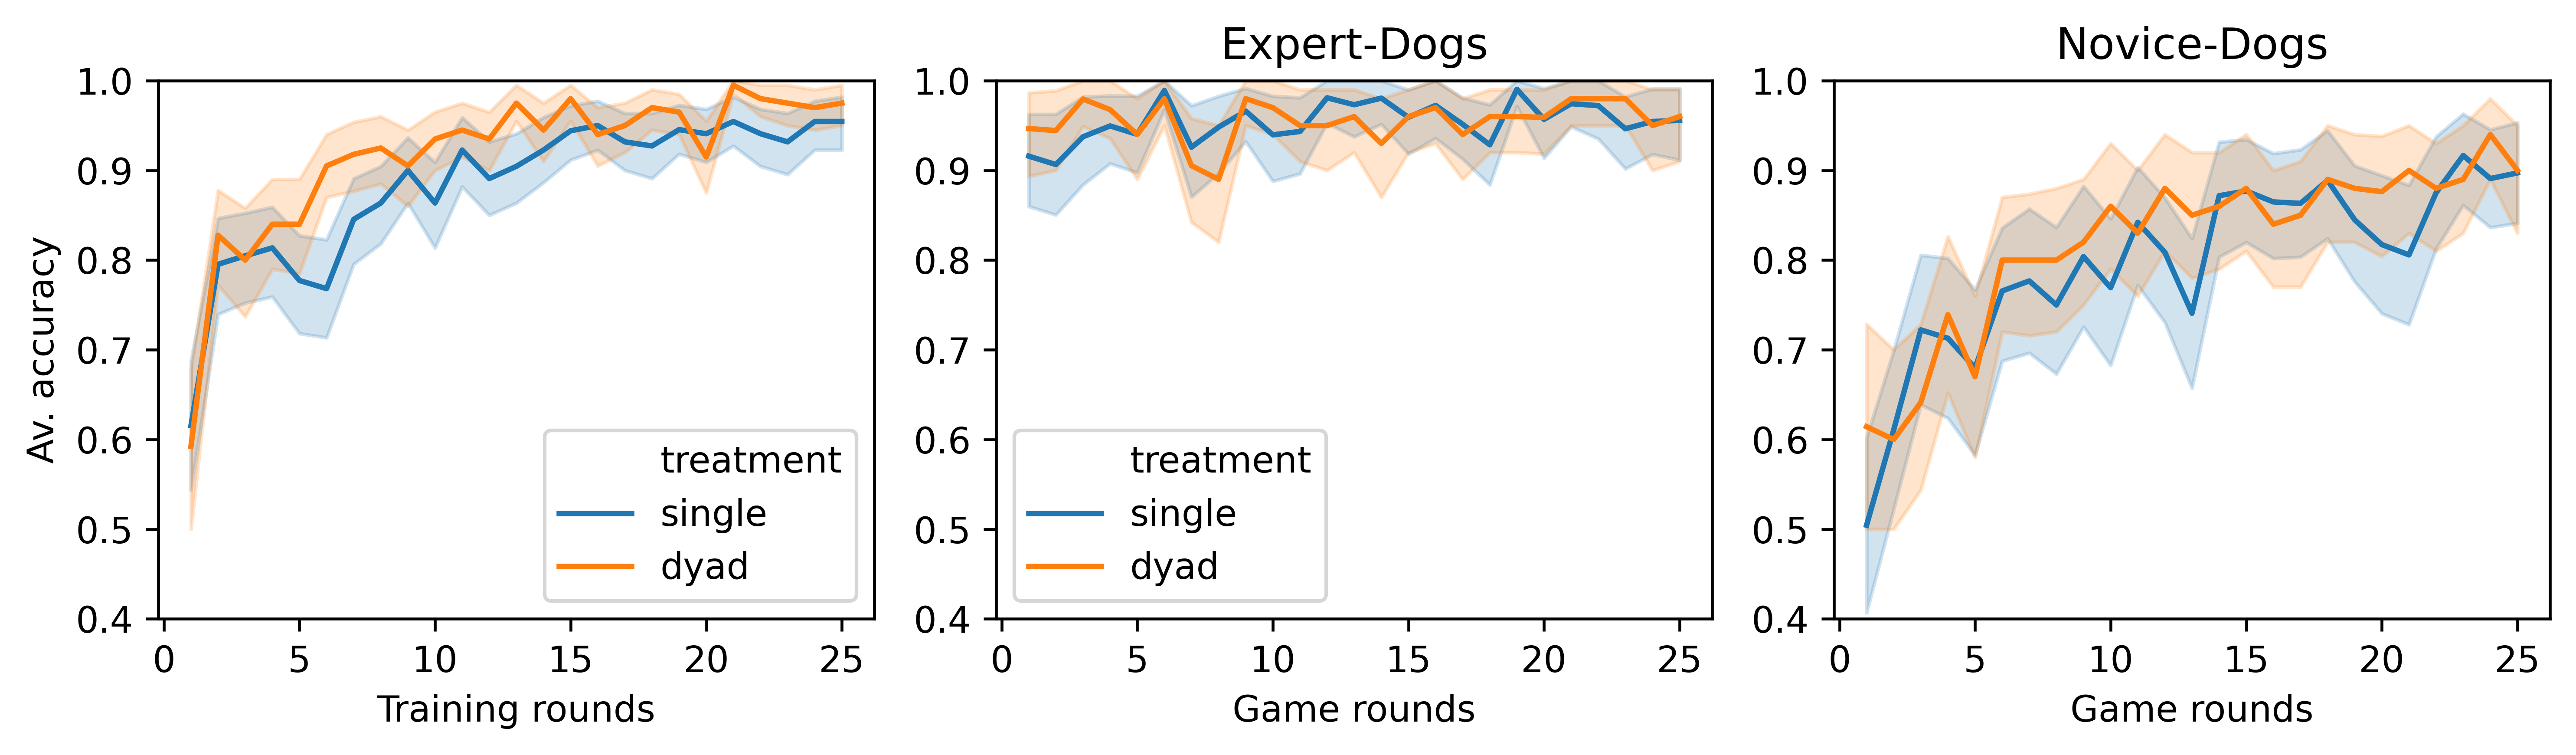

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), dpi=600)
sns.lineplot(x='round', y='accuracy', hue='treatment', data=data_training, ci=95, ax=ax[0])
sns.lineplot(x='round', y='accuracy', hue='treatment', data=dfE, ci=95, ax=ax[1])
sns.lineplot(x='round', y='accuracy', hue='treatment', data=dfN, ci=95, ax=ax[2])
ax[0].set_ylim(0.4, 1)
ax[0].set_xlabel('Training rounds')
ax[0].set_ylabel('Av. accuracy')
ax[0].set_ylim(0.4, 1)
ax[1].set_title("Expert-Dogs")
ax[1].set_xlabel("Game rounds")
ax[1].set_ylabel('')
ax[1].set_ylim(0.4, 1)
ax[2].set_title("Novice-Dogs")
ax[2].set_xlabel("Game rounds")
ax[2].set_ylabel("")
ax[2].set_ylim(0.4, 1)
ax[2].get_legend().remove()

fig.tight_layout()


In [6]:
fig.savefig('../imagenes/figura4.pdf')

----

In [7]:
dict_razas = {'A':'Cairn\n Terrier', 'C':'Norwich\n Terrier', 'B':'Irish\n Wolf\nhound', 'D':'Scottish\n Deer\nhound'}
dict_orden = {'A':1, 'C':2, 'B':3, 'D':4}

In [8]:
df = pd.DataFrame(data[(data['treatment']=='dyad') & (data['stage']=='Game rounds')])
df['query'] = ['Yes' if x>0 else 'No' for x in df['queried']]
df = df.groupby(['novice_in', 'kind'])['query'].value_counts(dropna=False, normalize=True).reset_index(name='pregunta')
df = df[df['query']=='Yes']
del df['query']
df.columns = ['Novice in', 'kind', 'query']
df['query'] = df['query']*100
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df_preguntas = df
df_preguntas

,Novice in,kind,query
1,hound,Cairn\n Terrier,1.121795
9,terrier,Cairn\n Terrier,40.000000
5,hound,Norwich\n Terrier,0.496689
12,terrier,Norwich\n Terrier,38.907285
3,hound,Irish\n Wolf\nhound,38.888889
7,hound,Scottish\n Deer\nhound,37.288136
14,terrier,Scottish\n Deer\nhound,0.333333


In [9]:
df = data.groupby('kind')['answered'].mean().reset_index()
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df.columns = ['kind', 'answered']
df_respondido = df
df_respondido.head()


,kind,answered
0,Cairn\n Terrier,0.936293
2,Norwich\n Terrier,0.964286
1,Irish\n Wolf\nhound,0.972689
3,Scottish\n Deer\nhound,0.907658


In [10]:
df = data.groupby('kind')['accuracy'].mean().reset_index()
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df.columns = ['kind', 'correct']
df_correcto = df
df_correcto.head()


,kind,correct
0,Cairn\n Terrier,0.866976
2,Norwich\n Terrier,0.910685
1,Irish\n Wolf\nhound,0.889389
3,Scottish\n Deer\nhound,0.900467


In [11]:
df_respuestas = pd.merge(df_respondido, df_correcto, on='kind')
df_respuestas

,kind,answered,correct
0,Cairn\n Terrier,0.936293,0.866976
1,Norwich\n Terrier,0.964286,0.910685
2,Irish\n Wolf\nhound,0.972689,0.889389
3,Scottish\n Deer\nhound,0.907658,0.900467


In [12]:
reporte_comprension_novatos = reporte_comprension[(reporte_comprension['expertise']=='novices') & (reporte_comprension['treatment']=='dyad')]
reporte_comprension_novatos.head()


,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded
1,dyad,21409433577947,B,novices,7.0,0.828571,22,0.954545,NaN
3,dyad,21409433577947,D,novices,7.0,0.571429,14,1.000000,NaN
4,dyad,32111755046981,A,novices,5.0,0.678571,3,0.666667,NaN
6,dyad,32111755046981,C,novices,4.0,0.757576,3,1.000000,NaN
9,dyad,38174543864515,B,novices,3.0,0.888889,20,1.000000,NaN


In [13]:
df_msgs = pd.DataFrame(data[(data['treatment']=='dyad') & (data['stage']=='Game rounds')])
df_msgs['kind_dog'] = ['terrier' if (x=='A') or (x=='C') else 'hound' for x in df_msgs['kind']]
df_msgs = pd.DataFrame(df_msgs[(df_msgs['novice_in']==df_msgs['kind_dog'])])
df_msgs['queried'] = [x if x>0 else 0 for x in df_msgs['queried']]
df_msgs = df_msgs.groupby(['player', 'round'])['queried'].mean().reset_index(name='#msg')
df_msgs.head()


,player,round,#msg
0,21409433577947,3,0.666667
1,21409433577947,4,0.666667
2,21409433577947,5,1.000000
3,21409433577947,6,1.000000
4,21409433577947,7,3.000000


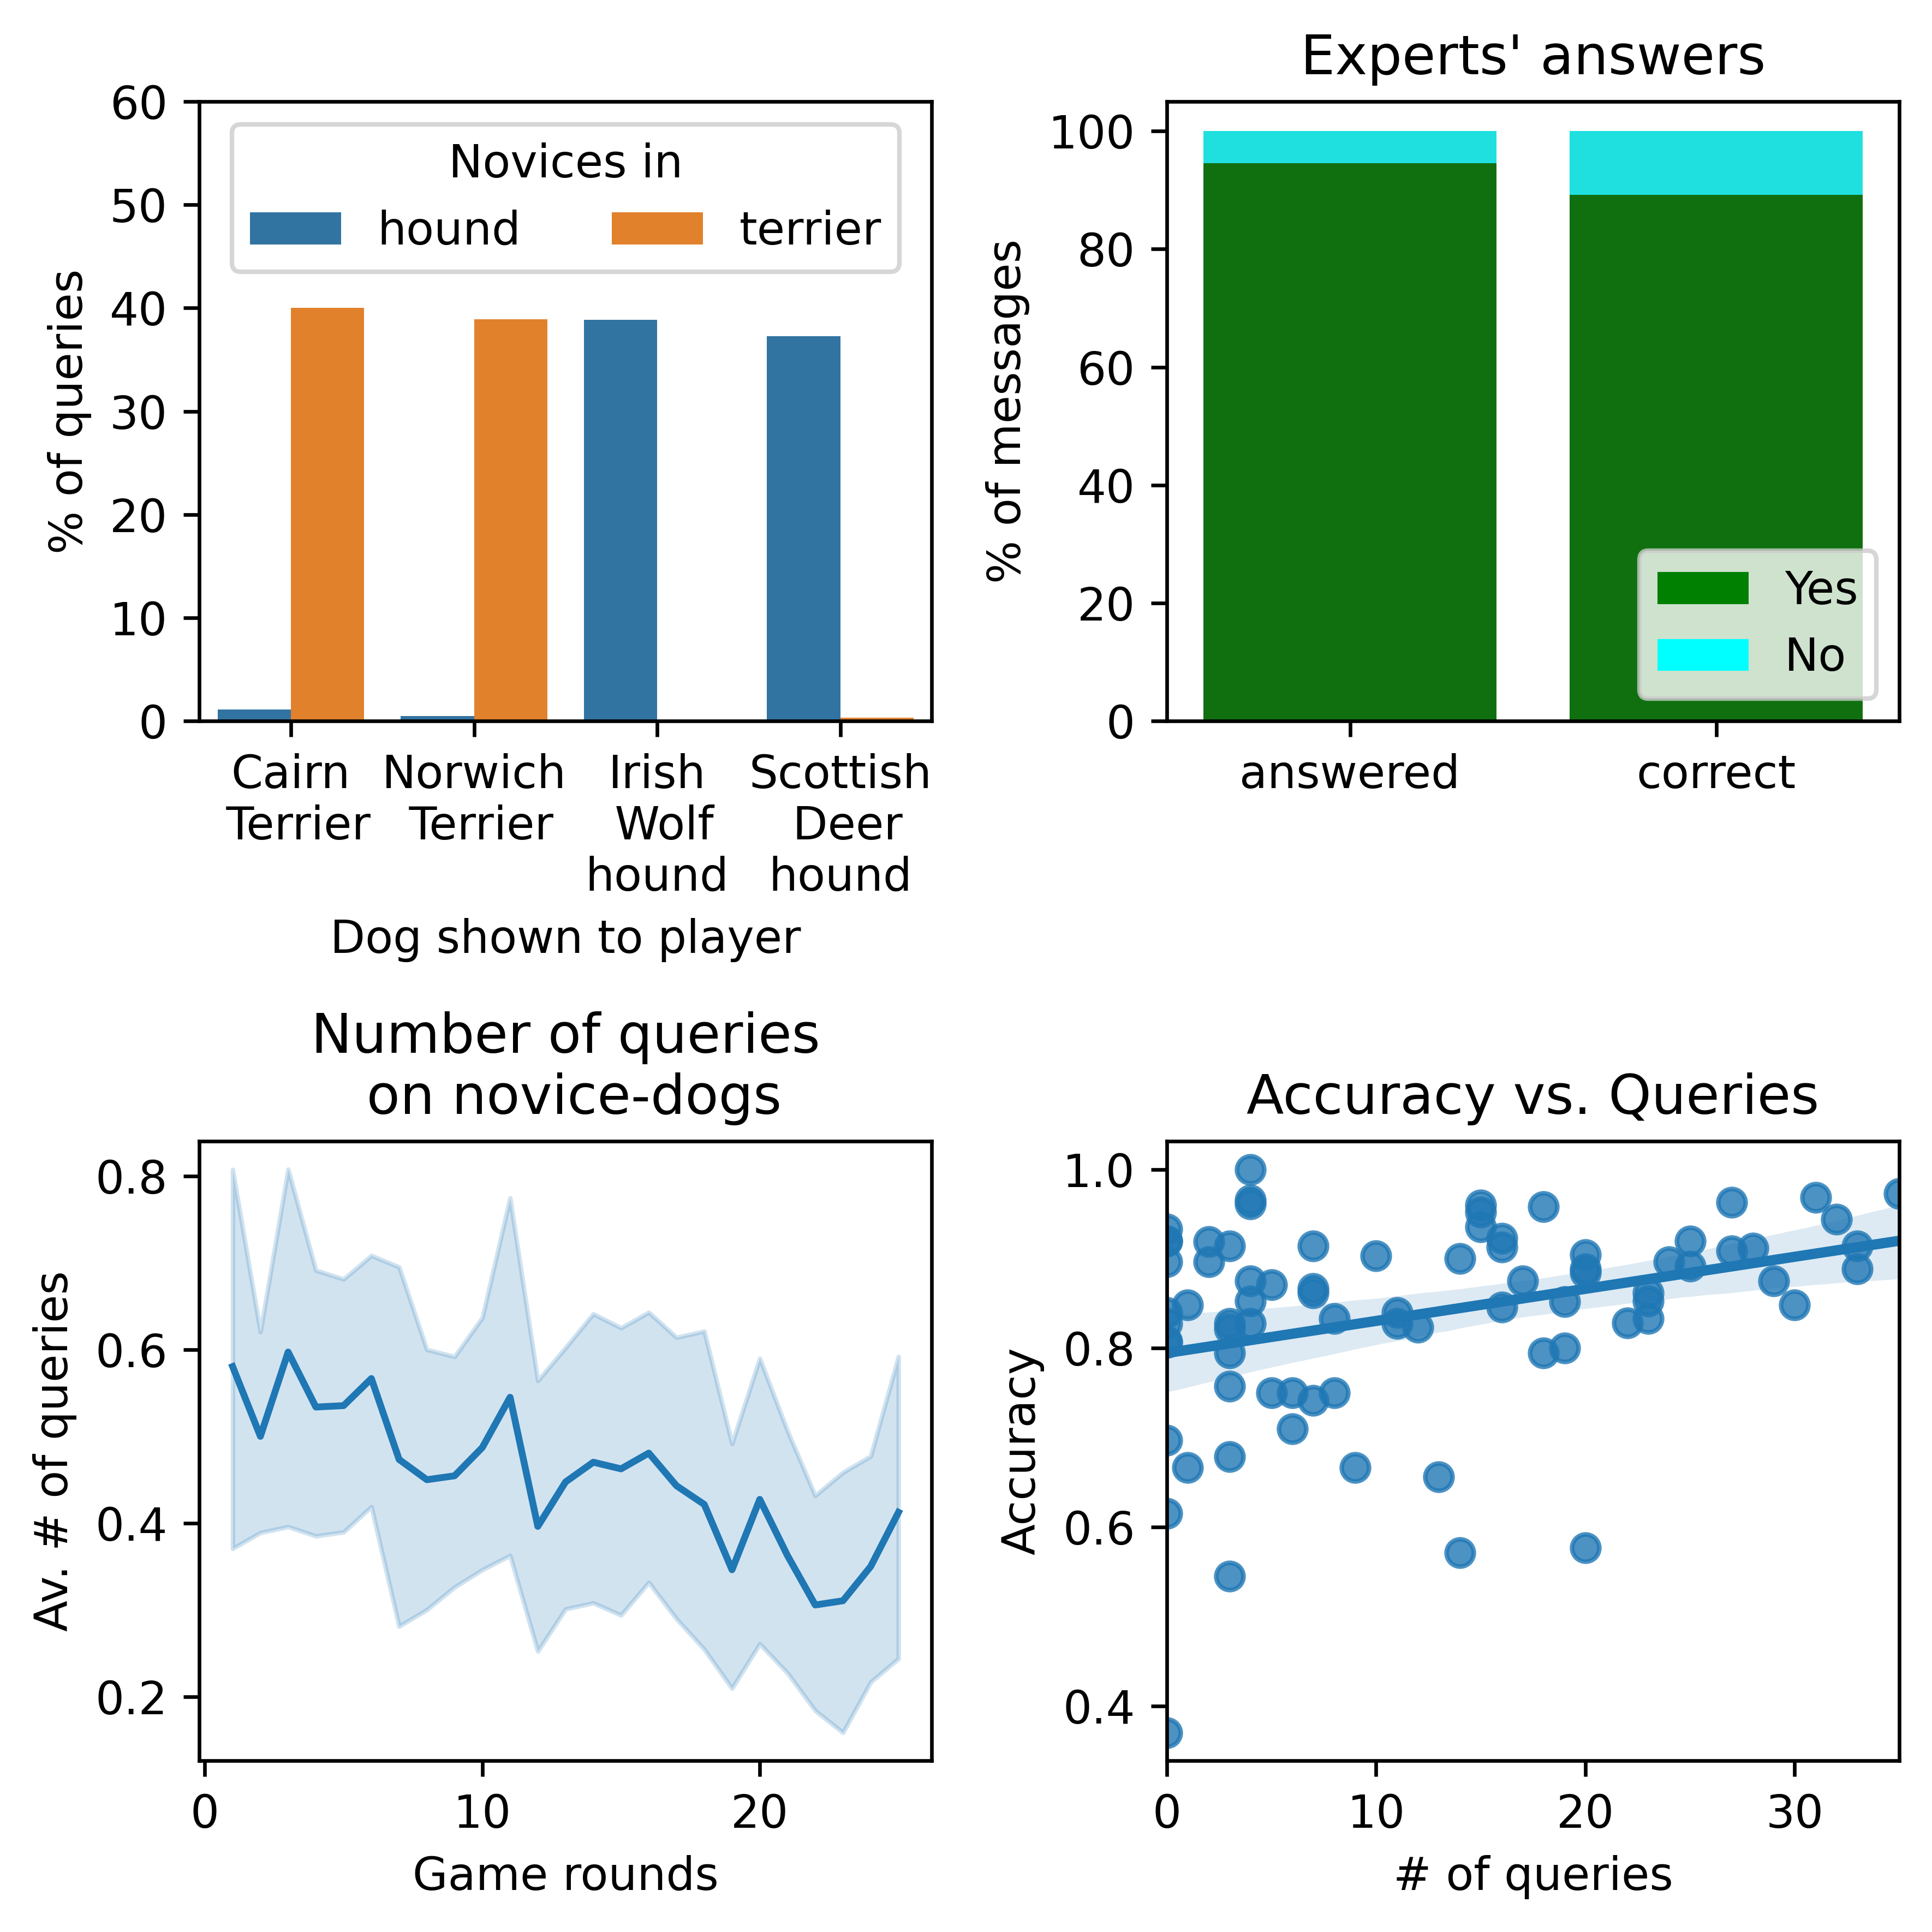

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=600)

sns.barplot(x='kind', y='query', hue='Novice in', data=df_preguntas, ax=ax[0, 0])
ax[0, 0].set_xlabel("Dog shown to player")
ax[0, 0].set(ylim=(0, 60))
ax[0, 0].set_ylabel("% of queries")
ax[0, 0].legend(title="Novices in", ncol=2, loc='upper center')#bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

respondido = df_respuestas['answered'].mean()
correcto = df_respuestas['correct'].mean()
sns.barplot(x=['answered', 'correct'], y=[100, 100], color = "cyan", ax=ax[0, 1])
sns.barplot(x=['answered', 'correct'], y=[respondido*100, correcto*100], color = "green", ax=ax[0, 1])
ax[0, 1].set_title("Experts' answers")
ax[0, 1].set_ylabel("% of messages")
topbar = plt.Rectangle((0,0),1,1,fc="cyan", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
ax[0, 1].legend([bottombar, topbar], ['Yes', 'No'], loc='lower right', ncol = 1, prop={'size':10})

sns.lineplot(x='round', y='#msg', data=df_msgs, ax=ax[1, 0], ci=95)
ax[1, 0].set_xlabel("Game rounds")
#ax[1, 0].set(ylim=(0, 2))
ax[1, 0].set_ylabel("Av. # of queries")
ax[1, 0].set_title("Number of queries\n on novice-dogs")

sns.regplot(x='queried', y='accuracy', data=reporte_comprension_novatos, ax=ax[1, 1])
ax[1, 1].set_title('Accuracy vs. Queries')
ax[1, 1].set_xlabel('# of queries')
ax[1, 1].set_ylabel('Accuracy')
#ax[1, 1].set(xlim=(0, 1.05))

fig.tight_layout()


In [15]:
fig.savefig('../imagenes/figura5.pdf')

---

In [66]:
reporte_comprension_expertos = pd.DataFrame(reporte_comprension[reporte_comprension['expertise']=='experts'])
reporte_comprension_expertos.head()


,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded
0,dyad,21409433577947,A,experts,7.0,0.931034,2,0.75,0.941176
2,dyad,21409433577947,C,experts,1.0,0.100000,1,1.00,0.888889
5,dyad,32111755046981,B,experts,6.0,0.897436,0,NaN,1.000000
7,dyad,32111755046981,D,experts,6.0,0.920000,1,1.00,NaN
8,dyad,38174543864515,A,experts,4.0,0.888889,0,NaN,1.000000


In [68]:
# Leave out outlier
reporte_comprension_expertos = reporte_comprension_expertos[reporte_comprension_expertos['accuracy']>0.2]

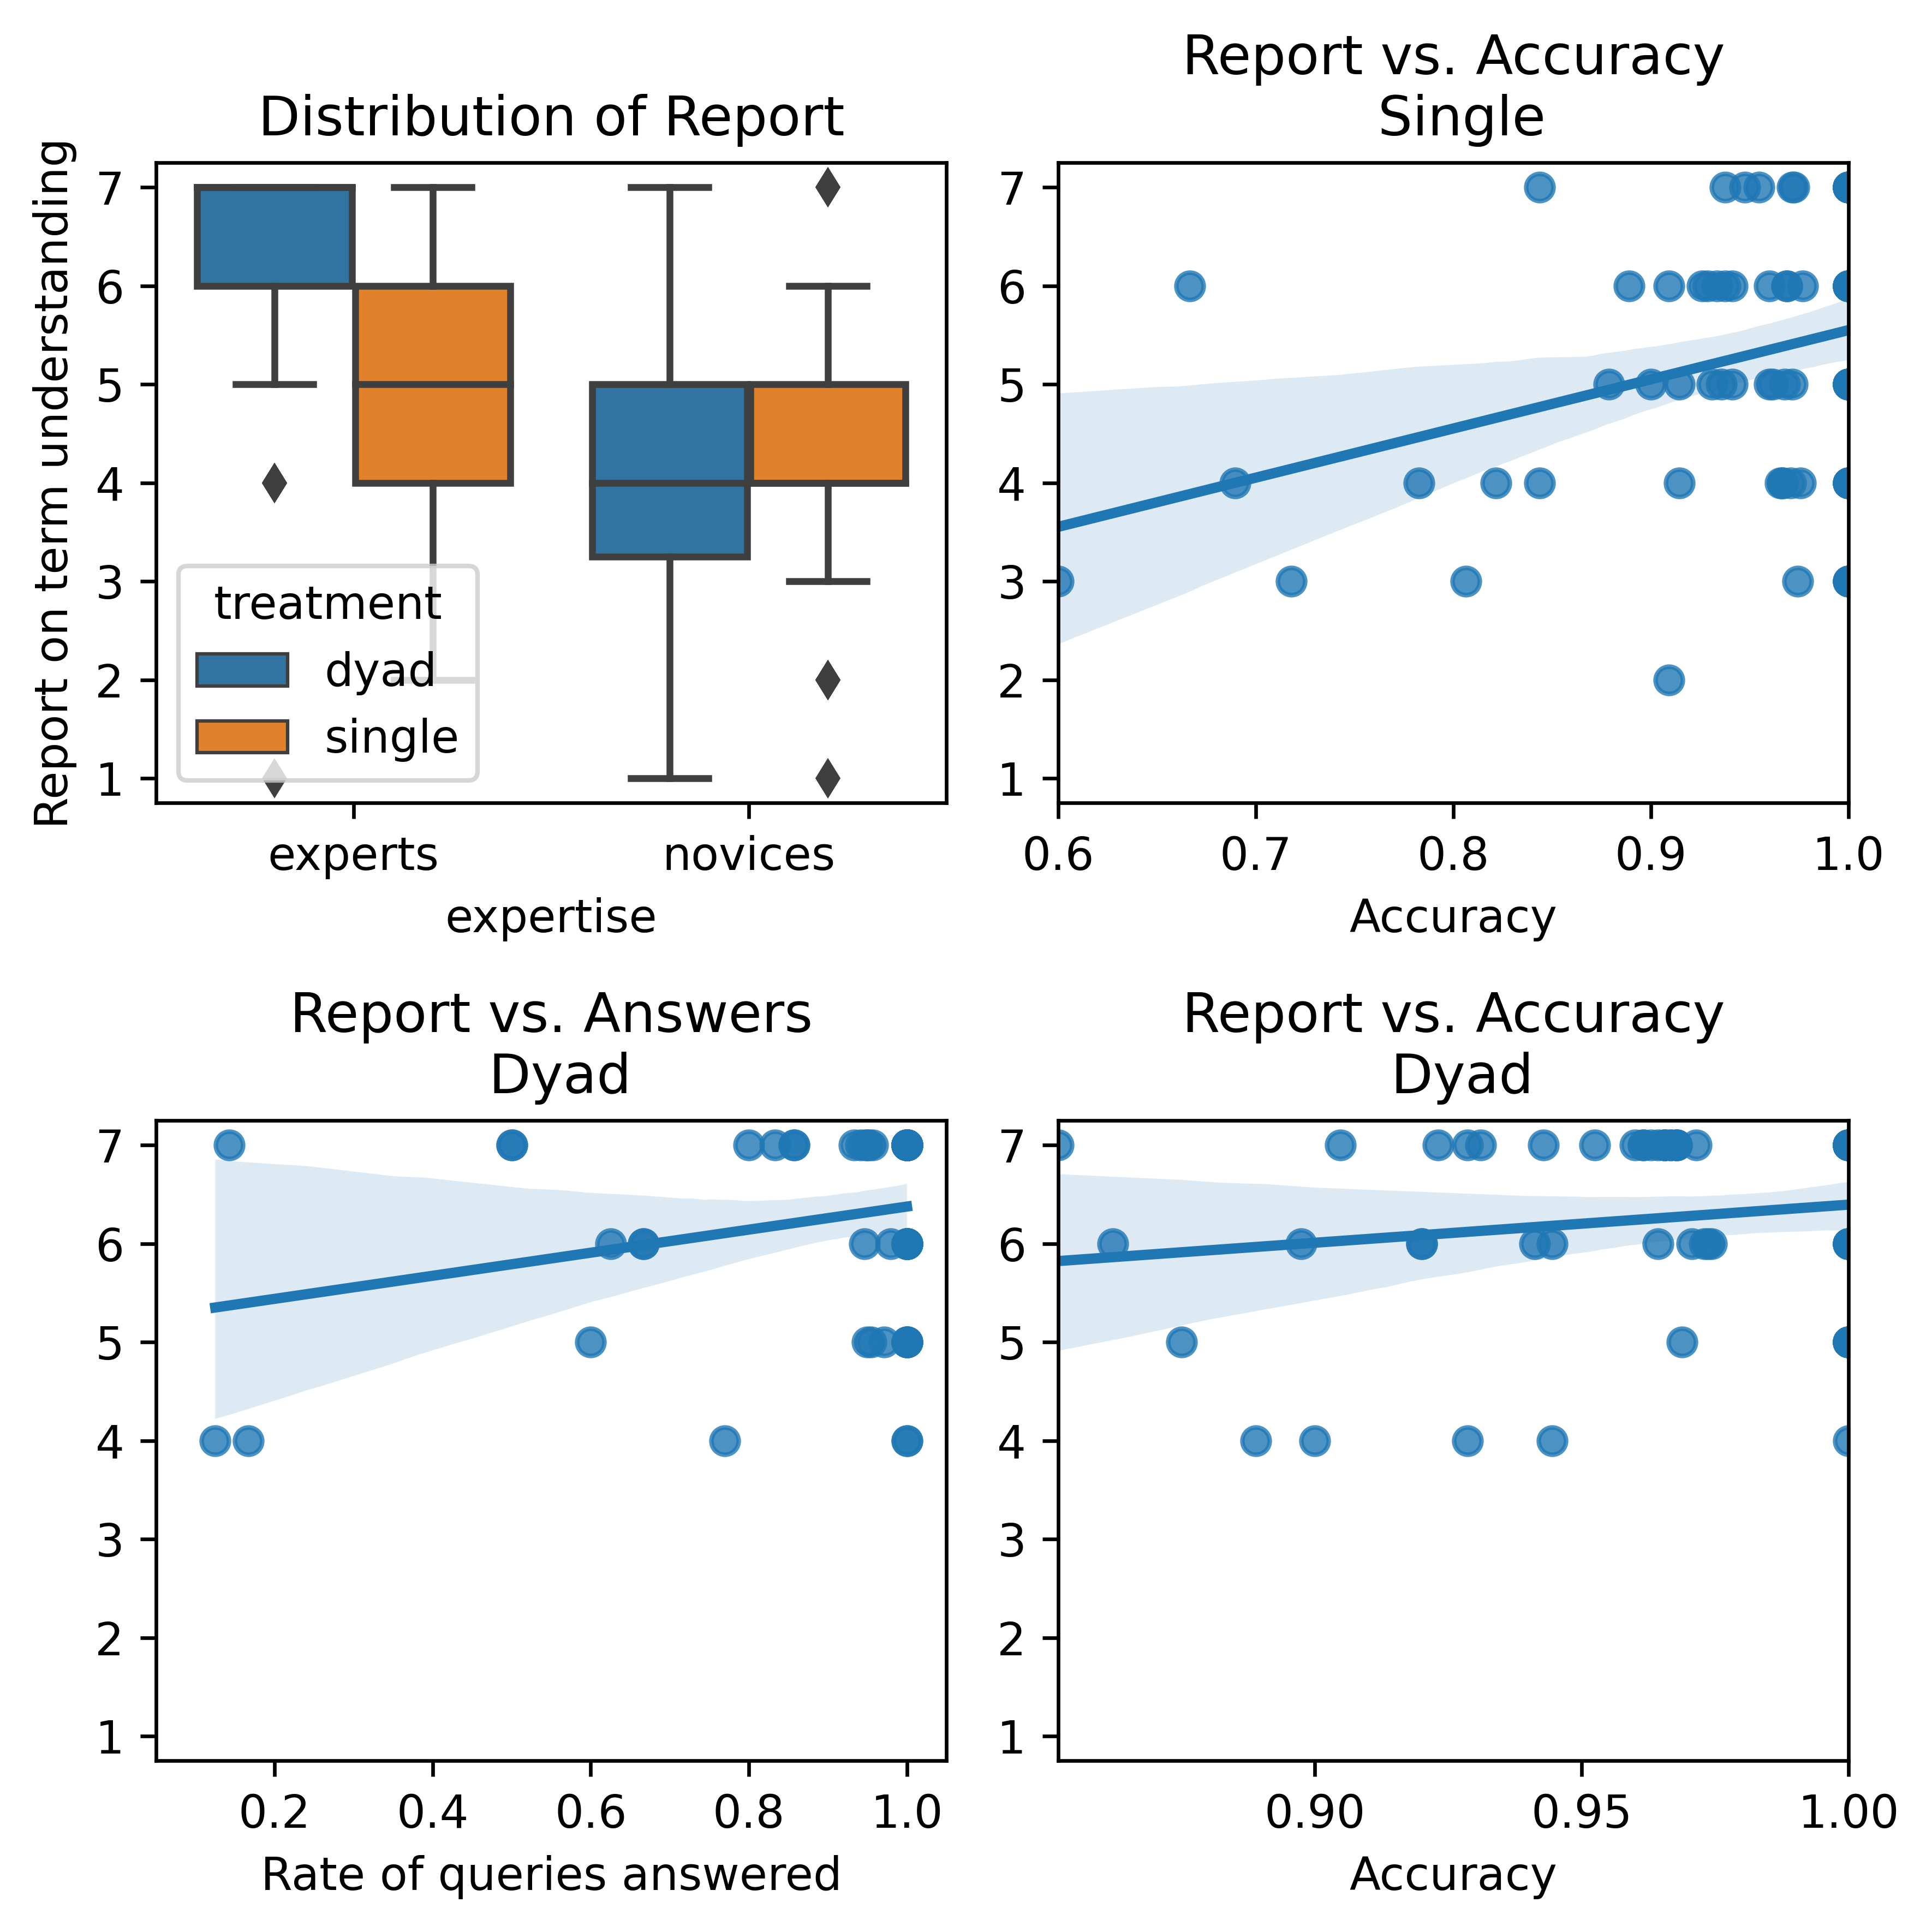

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(6,6), dpi=600)
sns.boxplot(x='expertise', y='report', hue='treatment', data=reporte_comprension, ax=axes[0, 0])
sns.regplot(y='report', x='player_responded', data=reporte_comprension_expertos, ax=axes[1, 0])

sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos[reporte_comprension_expertos['treatment']=='single'], ax=axes[0, 1])
sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos[reporte_comprension_expertos['treatment']=='dyad'], ax=axes[1, 1])

axes[0, 0].set_title('Distribution of Report')
axes[0, 0].set_ylabel('Report on term understanding')
axes[0, 0].set(ylim=(0.75, 7.25))
axes[1, 0].set_title('Report vs. Answers\n Dyad')
axes[1, 0].set_xlabel('Rate of queries answered')
axes[1, 0].set_ylabel('')
axes[1, 0].set(xlim=(0.05, 1.05))
axes[1, 0].set(ylim=(0.75, 7.25))
axes[0, 1].set_title('Report vs. Accuracy\n Single')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_ylabel('')
#axes[0, 1].set(xlim=(0.55, 1.05))
axes[0, 1].set(ylim=(0.75, 7.25))
axes[1, 1].set_title('Report vs. Accuracy\n Dyad')
axes[1, 1].set_xlabel('Accuracy')
axes[1, 1].set_ylabel('')
#axes[1, 1].set(xlim=(0.55, 1.05))
axes[1, 1].set(ylim=(0.75, 7.25))

fig.tight_layout()

In [77]:
df_novatos_single = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='novices')]
df_novatos_parejas = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='novices')]


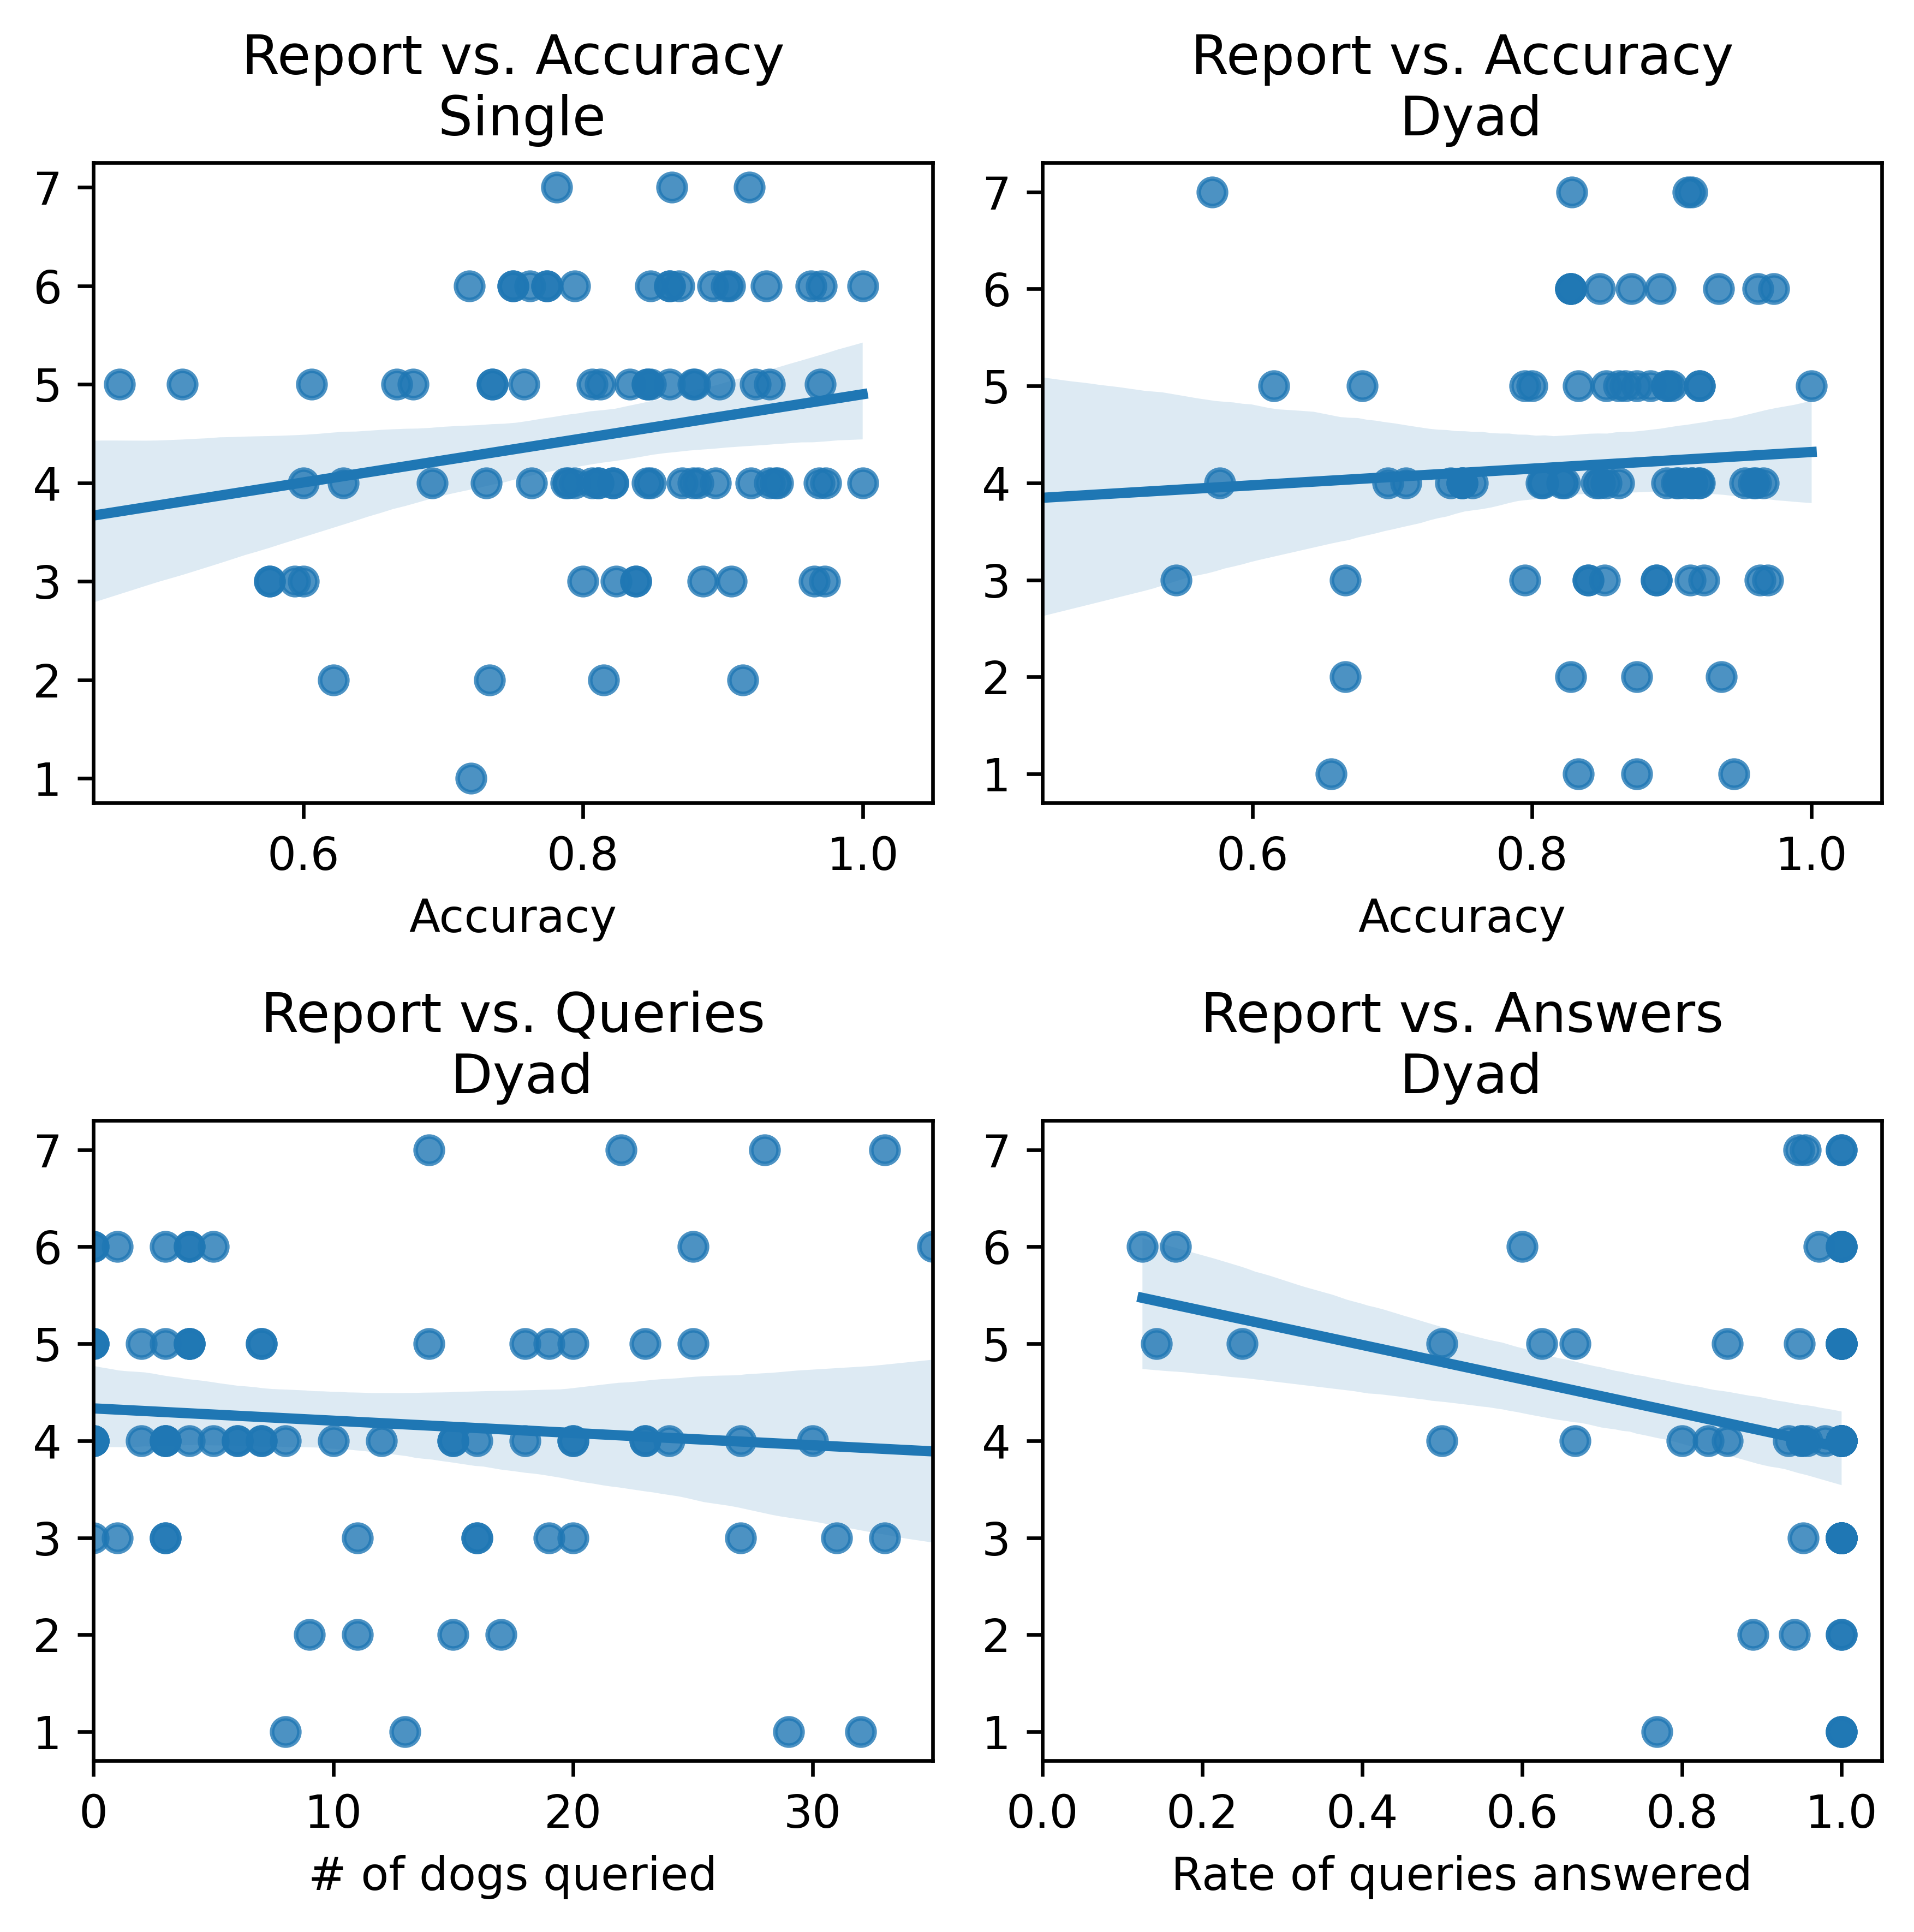

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(6,6), dpi=600)
sns.regplot(x='accuracy', y='report', data=df_novatos_single, ax=axes[0,0])
sns.regplot(x='accuracy', y='report', data=df_novatos_parejas, ax=axes[0,1])
sns.regplot(x='queried', y='report', data=df_novatos_parejas, ax=axes[1,0])
sns.regplot(x='answered', y='report', data=df_novatos_parejas, ax=axes[1,1])
axes[0,0].set_title('Report vs. Accuracy\n Single')
axes[0,0].set_xlabel('Accuracy')
axes[0,0].set_ylabel('')
axes[0,0].set(xlim=(0.45, 1.05))
axes[0,0].set(ylim=(0.75, 7.25))
axes[0,1].set_title('Report vs. Accuracy\n Dyad')
axes[0,1].set_xlabel('Accuracy')
axes[0,1].set_ylabel('')
axes[0,1].set(xlim=(0.45, 1.05))
#axes[0,0].set(ylim=(1, 7))

axes[1,0].set_title('Report vs. Queries\n Dyad')
axes[1,0].set_xlabel('# of dogs queried')
axes[1,0].set_ylabel('')
#axes[1,0].set(xlim=(0, 1.05))
#axes[0,1].set(ylim=(1, 7))
axes[1,1].set_title('Report vs. Answers\n Dyad')
axes[1,1].set_xlabel('Rate of queries answered')
axes[1,1].set_ylabel('')
axes[1,1].set(xlim=(0, 1.05))
#axes[0,2].set(ylim=(1, 7))

fig.tight_layout()

---

In [74]:
reporte_comprension_novatos_pareja = pd.DataFrame(reporte_comprension_novatos[reporte_comprension_novatos['treatment']=='dyad'])
reporte_comprension_novatos_pareja[['queried', 'accuracy']].corr()


,queried,accuracy
queried,1.000000,0.328632
accuracy,0.328632,1.000000


In [20]:
# Expertos entre tratamientos
x = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='experts')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='experts')]['report']
print("Diferencia de medias entre expertos en los dos tratamientos:", stats.ttest_ind(x,y).pvalue)

# Novatos entre tratamientos
x = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='novices')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='novices')]['report']
print("Diferencia de medias entre novatos en los dos tratamientos:", stats.ttest_ind(x,y).pvalue)

# Individual entre experticia
x = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='experts')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='single') & (reporte_comprension['expertise']=='novices')]['report']
print("Diferencia de medias entre experticia en individuos:", stats.ttest_ind(x,y).pvalue)

# Parejas entre experticia
x = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='experts')]['report']
y = reporte_comprension[(reporte_comprension['treatment']=='dyad') & (reporte_comprension['expertise']=='novices')]['report']
print("Diferencia de medias entre experticia en parejas:", stats.ttest_ind(x,y).pvalue)


Diferencia de medias entre expertos en los dos tratamientos: 4.616813119579728e-06
Diferencia de medias entre novatos en los dos tratamientos: 0.2141496616121506
Diferencia de medias entre experticia en individuos: 1.8846961035900696e-05
Diferencia de medias entre experticia en parejas: 1.0319760559902181e-18


### Regression models

In [75]:
reporte_comprension_expertos = pd.DataFrame(reporte_comprension[reporte_comprension['expertise']=='experts'])
# Leave out outlier
reporte_comprension_expertos = reporte_comprension_expertos[reporte_comprension_expertos['accuracy']>0.2]
reporte_comprension_expertos_parejas = pd.DataFrame(reporte_comprension_expertos[reporte_comprension_expertos['treatment']=='dyad'])
reporte_comprension_expertos_parejas.head()


,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded
0,dyad,21409433577947,A,experts,7.0,0.931034,2,0.75,0.941176
5,dyad,32111755046981,B,experts,6.0,0.897436,0,NaN,1.000000
7,dyad,32111755046981,D,experts,6.0,0.920000,1,1.00,NaN
8,dyad,38174543864515,A,experts,4.0,0.888889,0,NaN,1.000000
10,dyad,38174543864515,C,experts,7.0,0.923077,0,NaN,1.000000


In [59]:
reporte_comprension_expertos_parejas[['report', 'accuracy', 'player_responded']].corr()

,report,accuracy,player_responded
report,1.000000,0.15330,0.250686
accuracy,0.153300,1.00000,0.090120
player_responded,0.250686,0.09012,1.000000


In [63]:
model = ols("report ~ accuracy + player_responded", data=reporte_comprension_expertos_parejas)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 report   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.864
Date:                Wed, 02 Dec 2020   Prob (F-statistic):             0.0646
Time:                        10:15:25   Log-Likelihood:                -87.056
No. Observations:                  65   AIC:                             180.1
Df Residuals:                      62   BIC:                             186.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6873      2.947      0.573      0.569      -4.204       7.578
accuracy             3.6873      3.039      1.213      0.230      -2.388       9.763
player_responded     1.1090      0.570      1.945      0.056      -0.031       2.249
==============================================================================
Omnibus:                        7.369   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.582
Skew:                          -0.802   Prob(JB):                       0.0226
Kurtosis:                       2.521   Cond. No.                         59.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
df_novatos_single[['report', 'accuracy']].corr()

,report,accuracy
report,1.000000,0.262373
accuracy,0.262373,1.000000


In [79]:
df_novatos_parejas[['report', 'accuracy']].corr()

,report,accuracy
report,1.000000,0.069618
accuracy,0.069618,1.000000


In [80]:
df_novatos_parejas[['report', 'accuracy', 'queried', 'answered']].corr()


,report,accuracy,queried,answered
report,1.000000,0.069618,-0.094124,-0.267410
accuracy,0.069618,1.000000,0.328632,0.076166
queried,-0.094124,0.328632,1.000000,0.371553
answered,-0.267410,0.076166,0.371553,1.000000


In [82]:
model = ols("report ~ accuracy + queried + answered", data=df_novatos_parejas)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 report   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.841
Date:                Wed, 02 Dec 2020   Prob (F-statistic):              0.149
Time:                        10:48:07   Log-Likelihood:                -116.71
No. Observations:                  67   AIC:                             241.4
Df Residuals:                      63   BIC:                             250.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6953      1.686      2.784      0.007       1.325       8.065
accuracy       1.2261      1.856      0.661      0.511      -2.483       4.936
queried        0.0040      0.020      0.195      0.846      -0.037       0.045
answered      -1.8735      0.860     -2.178      0.033      -3.592      -0.155
==============================================================================
Omnibus:                        1.177   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.552
Skew:                           0.033   Prob(JB):                        0.759
Kurtosis:                       3.440   Cond. No.                         243.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""